# Задание по визуализации

Ссылка на данные: https://drive.google.com/drive/folders/1by7kkSwB-uMgIKKwEU-U_i81MnxMR4oM?usp=sharing

In [10]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


## Вариант 1

**Задания:**
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `Vmag` и `e_Plx`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `TargetClass`.
5. Построить матрицу корреляции для всех переменных.
6. Построить графики парных зависимостей между всеми числовыми переменными (если много переменных, возьмите только часть).
7. Построить график распределения любой переменной.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

**Датасет для задания называется train_var_1.csv**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train_var_1.csv")
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,6.901420,24.569658,0.862829,0.737416,G5V,20.449126,1
1,4.334196,2.198947,0.593309,1.153210,G2Ib,13.043324,0
2,7.873019,11.750465,0.616568,0.589166,F5V,17.736492,1
3,8.110014,2.143815,0.848508,1.322107,K2III,15.592469,0
4,8.025193,4.165622,0.899296,1.141646,K5III,16.379680,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31641 entries, 0 to 31640
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         31641 non-null  float64
 1   Plx          31641 non-null  float64
 2   e_Plx        31641 non-null  float64
 3   B-V          31641 non-null  float64
 4   SpType       31641 non-null  object 
 5   Amag         31641 non-null  float64
 6   TargetClass  31641 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.7+ MB


### Построение диаграммы разброса

<Axes: xlabel='Vmag', ylabel='e_Plx'>

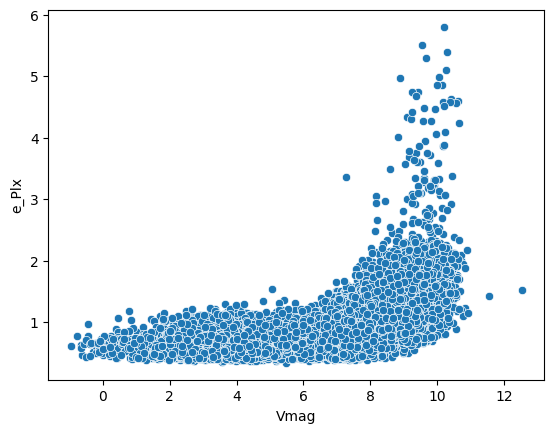

In [ ]:
sns.scatterplot(data=df, x="Vmag", y="e_Plx")

### График анализа пропущенных значений

<Axes: >

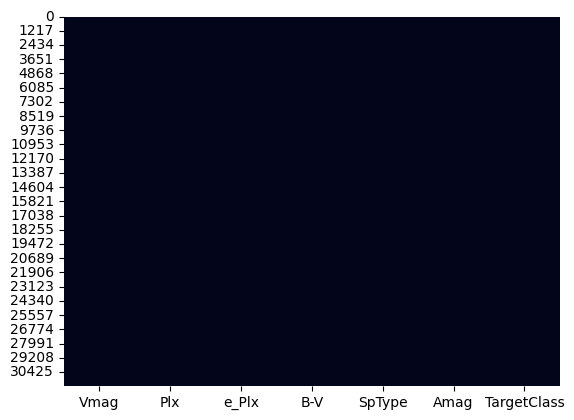

In [14]:
sns.heatmap(df.isnull(), cbar=False)

### boxplot для всех числовых переменных

In [16]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,31641.000000,31641.000000,31641.000000,31641.000000,31641.000000,31641.000000
mean,7.657008,6.060009,1.030286,0.712615,16.053552,0.499321
std,1.743426,6.336226,0.348017,0.474148,2.349601,0.500007
min,-0.960192,-24.900856,0.336300,-0.409355,4.157485,0.000000
25%,7.181646,2.184676,0.809005,0.342697,14.749502,0.000000
50%,8.108187,4.047433,0.992616,0.712378,16.130040,0.000000
75%,8.772251,7.948651,1.195221,1.090438,17.486865,1.000000
max,12.537229,86.048127,5.805426,2.866545,27.222762,1.000000


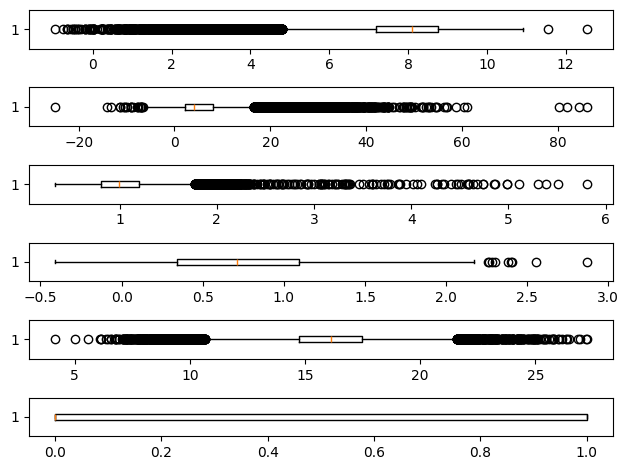

In [39]:
fig, ax = plt.subplots(6, 1)

ax[0].boxplot(df["Vmag"], vert=False)
ax[1].boxplot(df["Plx"], vert=False)
ax[2].boxplot(df["e_Plx"], vert=False)
ax[3].boxplot(df["B-V"], vert=False)
ax[4].boxplot(df["Amag"], vert=False)
ax[5].boxplot(df["TargetClass"], vert=False)

plt.tight_layout()

Логично, что `df["TargetClass"]` класса **bool** не будет иметь исключений, при нормальном распределении.

### barplot

<Axes: ylabel='TargetClass'>

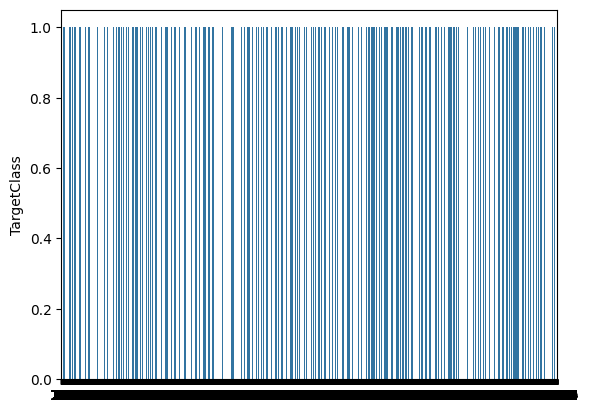

In [24]:
sns.barplot(df["TargetClass"])

### Матрицы корреляций

In [40]:
# Выбор всех столбцов типа object
object_cols = df.select_dtypes(include=['object']).columns

# Удаление столбцов типа object перед вычислением корреляций
df_numeric = df.drop(object_cols, axis=1)

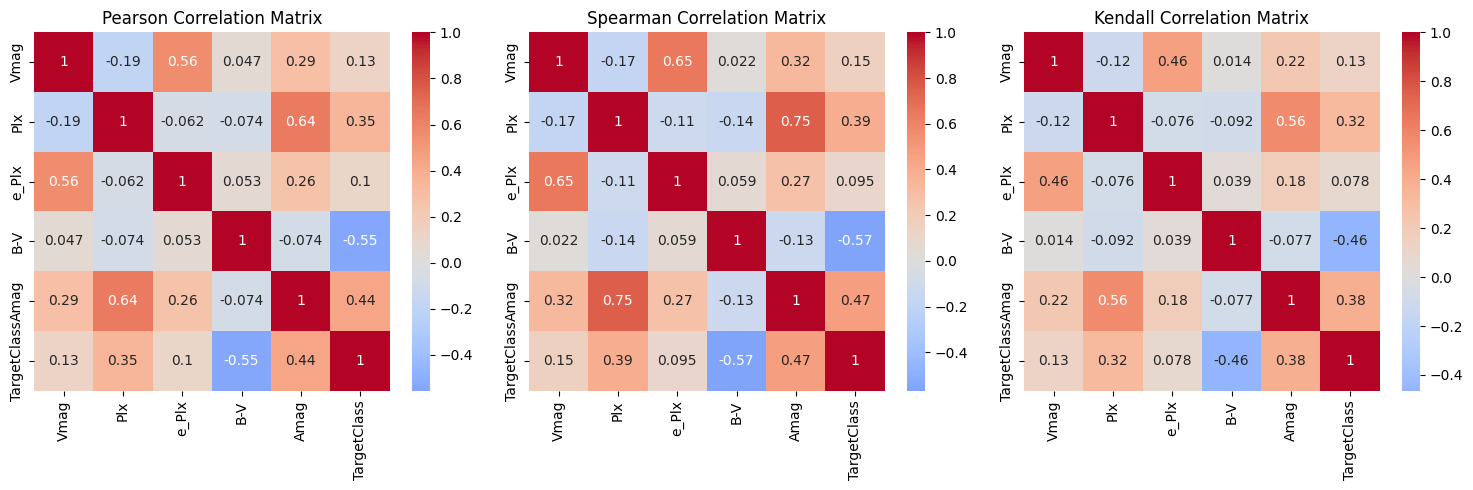

In [41]:
# Создание корреляционных матриц
pearson_corr = df_numeric.corr(method='pearson')
spearman_corr = df_numeric.corr(method='spearman')
kendall_corr = df_numeric.corr(method='kendall')

# Визуализация корреляционных матриц
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Указываем размер фигуры

sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0, ax=ax[0])
ax[0].set_title('Pearson Correlation Matrix')

sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, ax=ax[1])
ax[1].set_title('Spearman Correlation Matrix')

sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', center=0, ax=ax[2])
ax[2].set_title('Kendall Correlation Matrix')

plt.tight_layout()  # Для лучшего расположения графиков.
plt.show()

### Графики парных зависимостей

In [44]:
df["SpType"].nunique()

1842

/home/andredon/ADA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/andredon/ADA/.venv/lib/python3.12/site-packages/seaborn/axisgrid.p

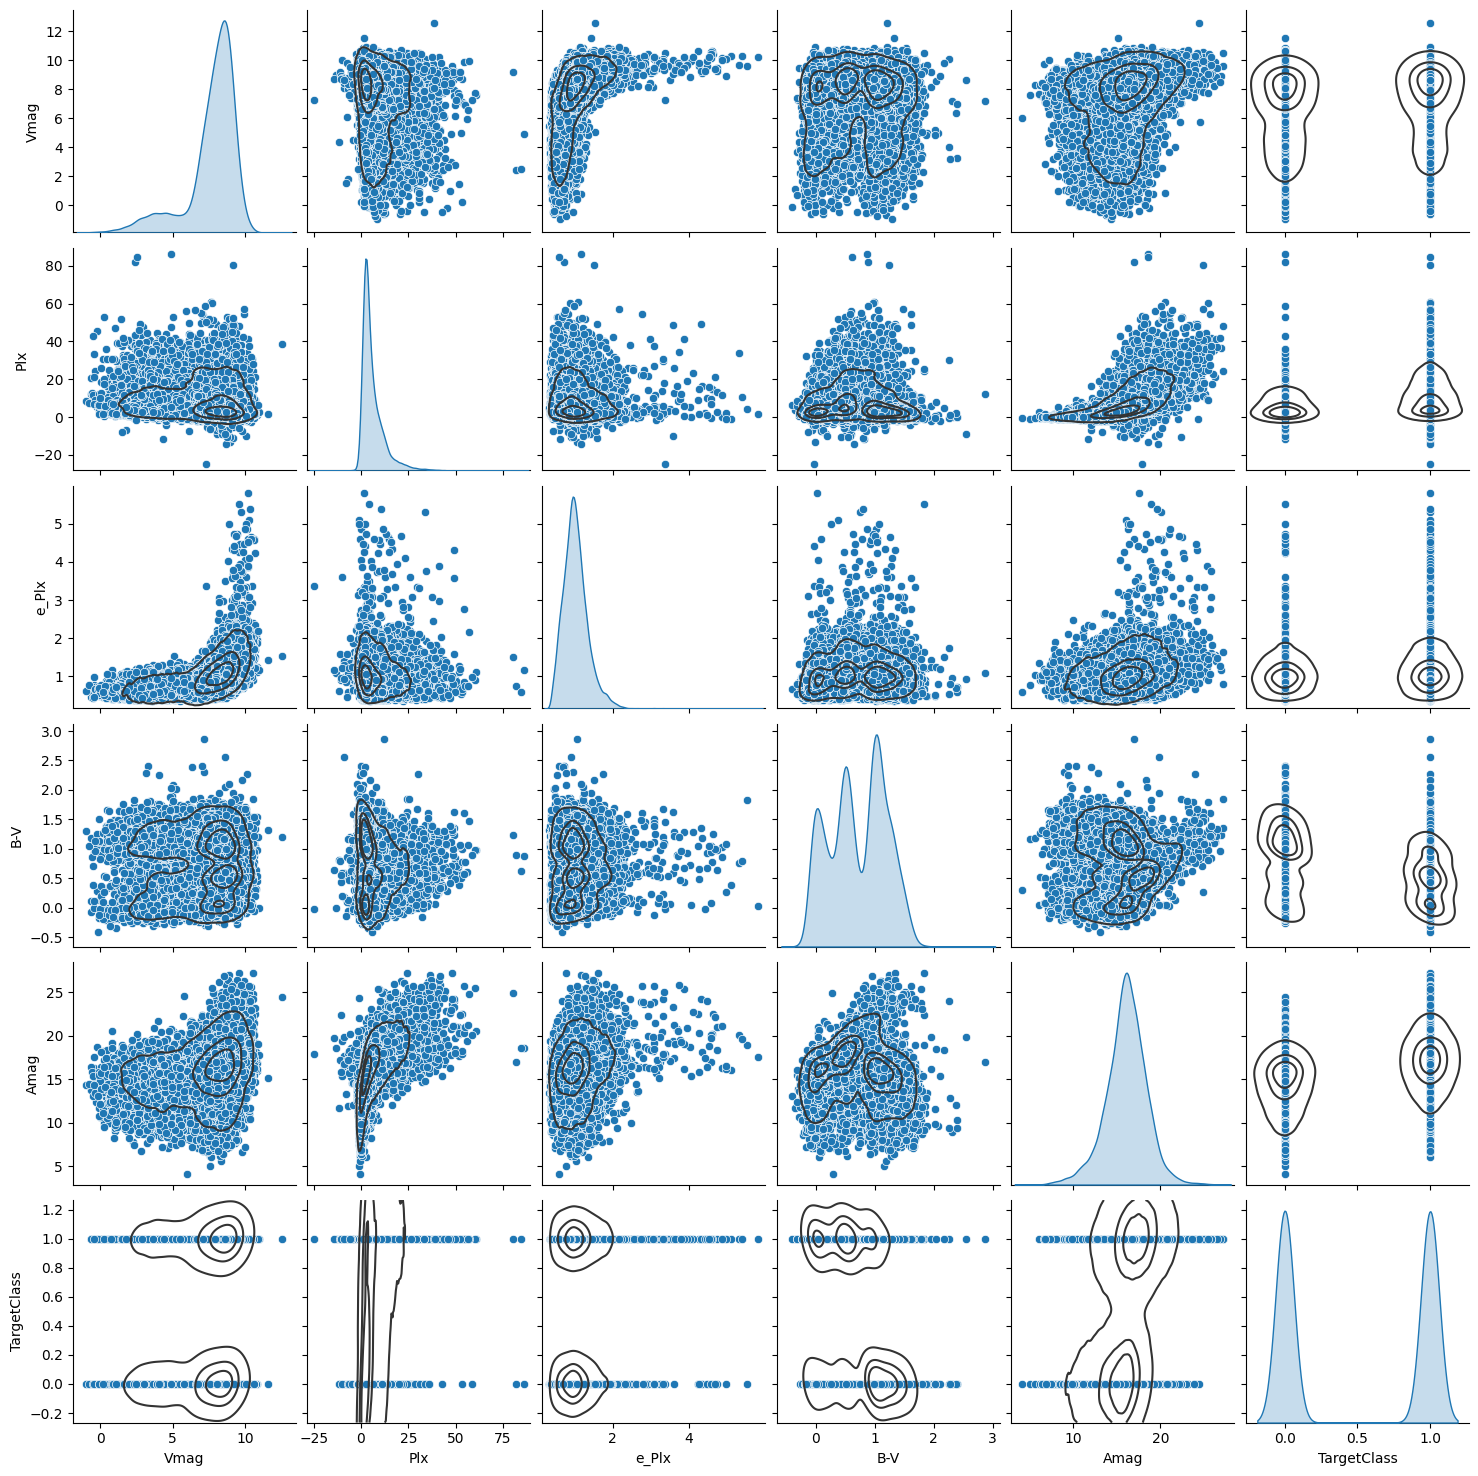

In [55]:
g = sns.pairplot(df, diag_kind="kde")
g.map(sns.kdeplot, levels=4, color=".2")

### График распределения

KeyError: 0

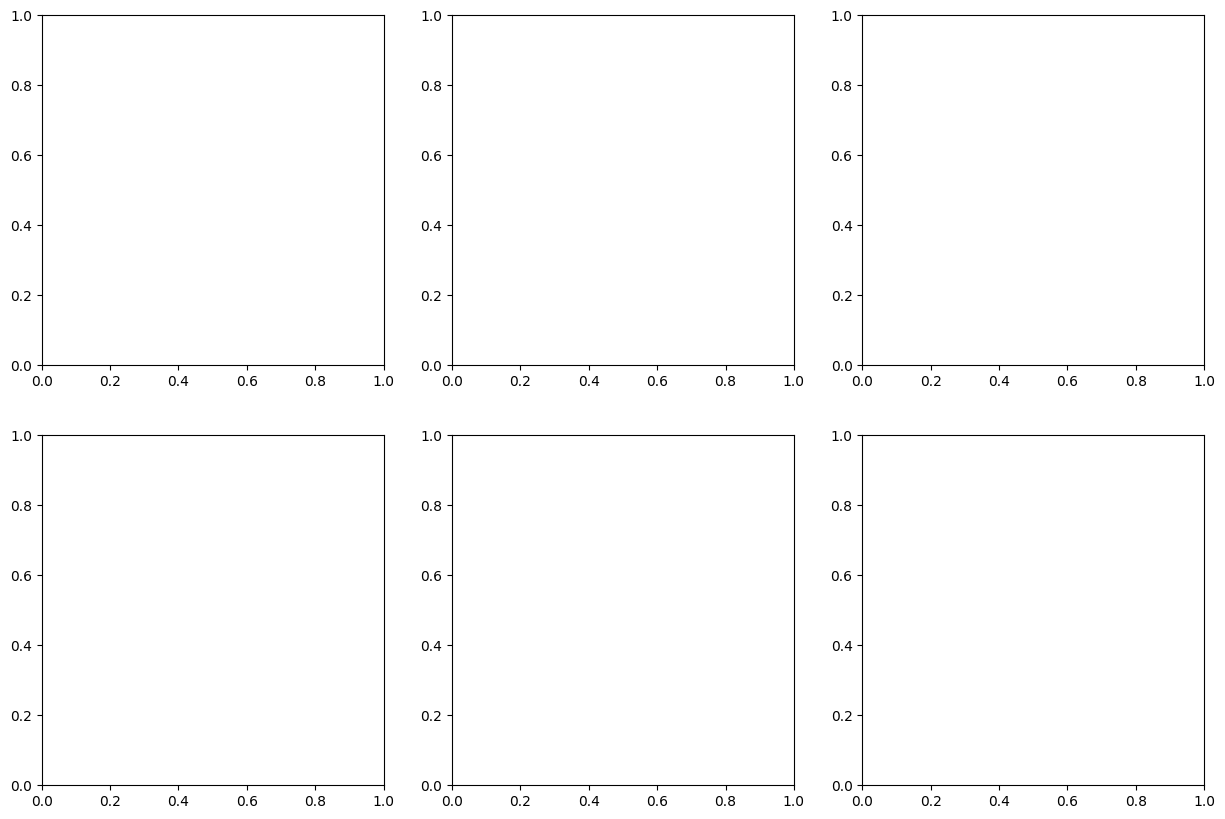

In [69]:
import numpy as np
from scipy import stats

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot histograms with KDE and determine best-fit distribution
for i, ax in enumerate(axes.flat):
    sns.histplot(df_numeric[i], kde=True, bins=20, ax=ax) 
    
    # Determine best-fit distribution
    x = df_numeric[i]
    dist_names = ['norm', 'expon', 'gamma', 'lognorm']
    best_fit_name, best_fit_params = None, None
    best_fit = 0
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        params = dist.fit(x)
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]
        pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(x - pdf, 2.0))
        if best_fit == 0 or sse < best_fit:
            best_fit = sse
            best_fit_name = dist_name
            best_fit_params = params

    ax.set_title(f"Best-fit: {best_fit_name}")

plt.tight_layout()
plt.show()


## Вариант 2

**Задания:**
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `age` и `balance`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `deposit`.
5. Построить матрицу корреляции для всех переменных.
6. Построить графики парных зависимостей между всеми числовыми переменными (если много переменных, возьмите только часть).
7. Построить график распределения любой переменной.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

**Датасет для задания называется train_var_2.csv**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv()
df.head()

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

## Вариант 3

**Задания:**
1. Постройте Диаграмму разброса (точечный график) от двух переменных: `MinTemp` и `MaxTemp`.
2. Построить график анализа пропущенных значений.
3. Построить boxplot для всех числовых переменных. График должен быть один, используя разные subplot() для каждой переменной (т.е. одна фигура и несколько сабплотов).
4. Построить barplot по переменной `RainTomorrow`.
5. Построить матрицу корреляции для всех переменных.
6. Построить графики парных зависимостей между всеми числовыми переменными (если много переменных, возьмите только часть).
7. Построить график распределения любой переменной.

*P.s. Все графики, оси и переменные должны быть подписаны. И по графикам необходимо сделать выводы.*

**Датасет для задания называется train_var_3.csv**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv()
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Brisbane,13.7,23.6,0.0,5.0,9.6,SSE,24.0,SSW,ESE,...,65.0,53.0,1028.4,1026.7,1.0,1.0,18.3,22.3,0,0
1,Sydney,15.4,21.2,61.2,5.8,2.7,S,43.0,WSW,SSW,...,91.0,65.0,1018.8,1016.5,8.0,7.0,15.6,20.7,1,1
2,Richmond,16.8,30.9,1.0,NaN,NaN,NE,35.0,NNW,NE,...,80.0,38.0,1020.4,1013.2,1.0,NaN,19.6,30.0,0,0
3,NorfolkIsland,13.9,17.1,0.2,3.8,8.9,SE,37.0,SE,SSE,...,56.0,63.0,1027.7,1026.1,3.0,1.0,15.3,15.8,0,0
4,Mildura,16.0,36.1,0.0,6.8,12.9,ENE,33.0,ENE,E,...,58.0,32.0,1018.5,1016.0,0.0,3.0,26.0,34.9,0,0
